In [121]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time 
import sys

In [2]:
def resize(im):
    x = im.shape[0]
    y = im.shape[1]
    return im[int(x/3):int(2*x/3), int(y/3):int(2*y/3)]

In [3]:
def load_and_resize(path):
    image = cv2.imread(path)
    #plt.imshow(image)
    #plt.show()
    image = resize(image)
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    return imgRGB

In [205]:
def blur(img):
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    seuil=190.0
    ret,seg_red = cv2.threshold(img,190,255.0,cv2.THRESH_BINARY)
    plt.imshow(seg_red)
    plt.show()
    
    #gray = cv2.GaussianBlur(seg_red, (7, 7), 0)
    #plt.imshow(gray)
    #plt.show()
    return seg_red


In [179]:
def transform(gray):
    edged = cv2.Canny(gray, 100, 100)
    #plt.imshow(edged)
    #plt.show()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    #plt.imshow(closed)
    #plt.show()
    im2, cnts, hierarchy = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return cnts

In [180]:
def sobel(img):
    scale = 1
    delta = 0
    ddepth = cv2.CV_16S

    img = cv2.GaussianBlur(img,(1,1),0)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    plt.show()

    # Gradient-X
    grad_x = cv2.Sobel(gray,ddepth,1,0,ksize = 3, scale = scale, delta = delta,borderType = cv2.BORDER_DEFAULT)
    grad_x = cv2.Scharr(gray,ddepth,1,0)

    # Gradient-Y
    grad_y = cv2.Sobel(gray,ddepth,0,1,ksize = 3, scale = scale, delta = delta, borderType = cv2.BORDER_DEFAULT)
    grad_y = cv2.Scharr(gray,ddepth,0,1)

    abs_grad_x = cv2.convertScaleAbs(grad_x)   # converting back to uint8
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    dst = cv2.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)
    dst = cv2.add(abs_grad_x,abs_grad_y)

    plt.imshow(dst)
    plt.show()
    return dst


In [348]:
def find_screen(cnts, image):
    total = 0
    approx_tmp = 0
    approx = []
    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        print("perimetre ", peri)
        approx_tmp = cv2.approxPolyDP(c, 0.02 * peri, True)
        approx_tmp = np.squeeze(approx_tmp)
        #print(approx)
        cv2.drawContours(image, [approx_tmp], -1, (0, 255, 0), 4)
        if(len(approx_tmp) == 4):
            print("On a trouver un rectangle")
            if (peri > 100 and peri < 500):
                approx.append(approx_tmp)
                #print(approx)
                #cv2.drawContours(image, [approx_tmp], -1, (0, 255, 0), 4)
    #plt.imshow(image)
    #plt.show()
    return approx

In [311]:
def bords(approx):
    if(len(approx) == 2):
        approx = np.concatenate((approx[0], approx[1]), axis = 0)
    approx = np.squeeze(approx)
    bord = []
    min_x = sys.maxsize
    max_x = 0
    min_y = sys.maxsize
    max_y = 0
    config = -1
    for appro in approx:
        if appro[0] > max_x:
            max_x = appro[0]
        if appro[0] < min_x:
            min_x = appro[0]
        if appro[1] > max_y:
            max_y = appro[1]
        if appro[1] < min_y:
            min_y = appro[1]
    
    bord.extend([min_x, max_x, min_y, max_y])
    
    if(len(approx) == 4):
        if(max_x - min_x > max_y - min_y):
            config = 2
        else:
            config = 1
    else:
        approx_x = approx[:,0]
        approx_y = approx[:,1]
        fit = np.polyfit(approx_x,approx_y,1)
        if(fit[0] < 0):
            config = 3
        else: 
            config = 4
    return bord,config

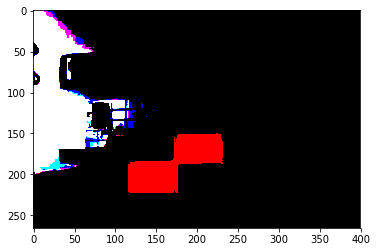

image rouge 
[[204 201 207]
 [202 200 207]
 [201 199 206]
 ..., 
 [ 47  24  19]
 [ 48  25  20]
 [ 49  25  21]]


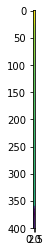

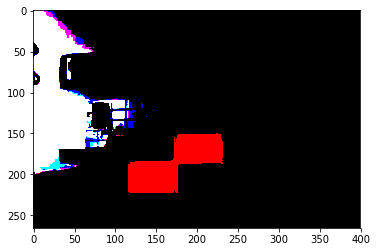

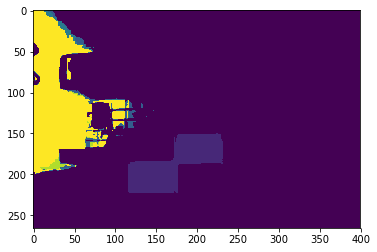

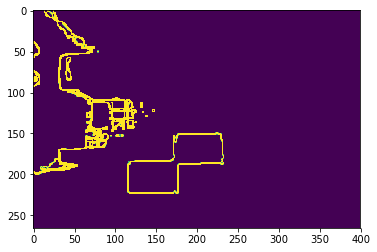

393.3553384542465
perimetre 393.3553384542465
13.071067690849304
50.97056245803833
52.72792184352875
59.21320307254791
967.6711333990097


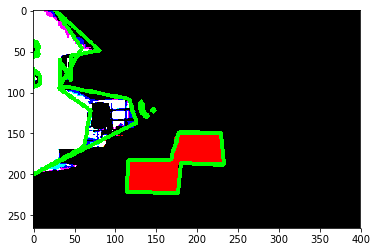

les bords sont  [0, 126, 0, 200]
La configuration est la  4
--- 2.0588481426239014 seconds ---


In [228]:
start_time = time.time()
bord = list()
imageRGB = load_and_resize('screen_red3.png')
imageRGB = blur(imageRGB)
plt.imshow(imageRGB)
plt.show()
imageS = sobel(imageRGB)
approx = find_screen(transform(imageS), imageRGB)
bord,config = bords(approx)
print("les bords sont ", bord)
print("La configuration est la ", config)
    
print("--- %s seconds ---" % (time.time() - start_time))

In [229]:
[149, 170] in approx

False

In [101]:
approx

array([[[230, 150]],

       [[178, 149]],

       [[168, 182]],

       [[118, 184]],

       [[115, 222]],

       [[177, 223]],

       [[179, 189]],

       [[233, 188]]], dtype=int32)

In [102]:
bord

[115, 233, 149, 223]

In [106]:
print(approx.shape)
approx = np.squeeze(approx)
print(approx.shape)
print(approx)
print(approx[:,0])
print(approx[:,1])
print(approx[0])

(8, 2)
(8, 2)
[[230 150]
 [178 149]
 [168 182]
 [118 184]
 [115 222]
 [177 223]
 [179 189]
 [233 188]]
[230 178 168 118 115 177 179 233]
[150 149 182 184 222 223 189 188]
[230 150]


In [92]:
type(approx)
approx = np.array(approx)

approx[:,:,0]


approx_x = np.array(approx[:,:,0])
approx_x = np.squeeze(approx_x)

approx_y = np.array(approx[:,:,1])
approx_y = np.squeeze(approx_y)
print(approx_x)
print(approx_x.shape)

print(approx_y)
print(approx_y.shape)

[230 178 168 118 115 177 179 233]
(8,)
[150 149 182 184 222 223 189 188]
(8,)


In [93]:
print(approx)

fit = np.polyfit(approx_x,approx_y,  1)

print(fit)


[[[230 150]]

 [[178 149]]

 [[168 182]]

 [[118 184]]

 [[115 222]]

 [[177 223]]

 [[179 189]]

 [[233 188]]]
[  -0.29343622  237.15297961]


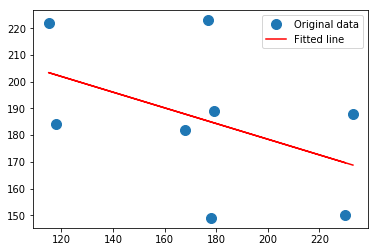

In [94]:
plt.plot(approx_x, approx_y, 'o', label='Original data', markersize=10)
plt.plot(approx_x, fit[0]*approx_x + fit[1], 'r', label='Fitted line')
plt.legend()
plt.show()

In [119]:
import sys

In [120]:
sys.maxsize

9223372036854775807

In [358]:
def detection(path):
    start_time = time.time()
    img = cv2.imread(path)
    img = resize(img)
    #on split l'image en fonction des couleurs 
    b,g,r = cv2.split(img)
    
    print("--- %s seconds ---" % (time.time() - start_time))

    # on parcours l'image et on mets r a 0 si b ou r superieur a un seuil (ici 50)
    for x in range(0, r.shape[0]):
        for y in range(0, r.shape[1]):
            if(b[x][y] > 50 or g[x][y] > 50):
                r[x][y] = 0

    print("--- %s seconds ---" % (time.time() - start_time))

    # on applique un filtre binaire 
    ret,seg_red = cv2.threshold(r,190,255.0,cv2.THRESH_BINARY)

    # detecte 
    edged = cv2.Canny(seg_red, 100, 100)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
    im2, cnts, hierarchy = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    approx = find_screen(cnts, img)

    print(bords(approx))
    print("--- %s seconds ---" % (time.time() - start_time))


In [363]:
detection('screen_red1.png')

--- 0.16934800148010254 seconds ---
--- 0.9138102531433105 seconds ---
perimetre  250.04163002967834
On a trouver un rectangle
([179, 231, 149, 220], 1)
--- 0.9176392555236816 seconds ---


In [364]:
detection('screen_red2.png')

--- 0.11343598365783691 seconds ---
--- 0.9174818992614746 seconds ---
perimetre  251.21320295333862
On a trouver un rectangle
([149, 221, 166, 219], 2)
--- 0.9202489852905273 seconds ---


In [361]:
detection('screen_red3.png')

--- 0.07519912719726562 seconds ---
--- 1.0450901985168457 seconds ---
perimetre  185.55634891986847
On a trouver un rectangle
perimetre  176.3847759962082
On a trouver un rectangle
([117, 232, 150, 222], 3)
--- 1.0491840839385986 seconds ---


In [362]:
detection('screen_red4.png')

--- 0.10425400733947754 seconds ---
--- 1.0665080547332764 seconds ---
perimetre  184.97056245803833
On a trouver un rectangle
perimetre  175.79898953437805
On a trouver un rectangle
([150, 221, 169, 283], 4)
--- 1.0740408897399902 seconds ---
